In [3]:
import numpy as np

#  3장. 신경망

>-저자가 만들어온 가중치를 셋팅해서 필기체 데이터를 인식하는 3층 신경망을 생성
( 저자가 학습을 해서 만들어온 가중치 ) 


>- 신경망안에 들어가는 함수들 소개
    > 1. 활성화 함수
            - 계단함수
            - 시그모이드 함수
            - 렐루 함수
      >2. 출력층 함수
            - 항등함수 (회귀분석)
            - 소프트맥스 함수 (분류)
      >3. 오차함수


* 이책의 특징이 전부 파이썬 날코딩으로 다 일일이 신경망을 만든다.  그리고 나서
  나중에 tensorflow 와 pytoch 를 사용해서 신경망을 구현한다. 
 

# 퍼셉트론에서 신경망으로

## 활성화 함수 


### 계단함수 p69

" 숫자 0과 1을 리턴하는 함수 " 

>* 입력값  x <= 0 ----> 0 을 리턴
>* 입력값  x > 0  ----> 1 을 리턴

### 예제:

In [4]:
def step_function(x):
    if x <= 0:
        return 0
    if x > 0:
        return 1

In [5]:
print(step_function(3.0))

1


In [6]:
x_data = np.array([-1,0,1])
# print(step_function(x_data))
# ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# 넘파이 배열은 넣을수가 없다. 

### 예제2. numpy 배열을 넣을 수 있도록 step_function을 다시 생성합니다. 

In [7]:
def step_function(x):
    y = x >0
    return (y)

In [8]:
print(step_function(3.0))

True


In [9]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)
# bool 타입을 np int 로 변환 해라~

In [10]:
print(step_function(np.array(3.0)))
print(step_function(np.array(-3.0)))

1
0


설명: 신경망에서 흘러가는 모든 데이터는 numpy array 형태의 다차원 데이터 이므로 신경망내에서 쓰여질 활성화 함수도 numpy array 형태의 데이터를 받아서 처리할 수 있도록 생성되어져야 합니다. 

### 문제34. 위에서 만든 step_function 을 이용해서 책 71페이지에 나온것처럼 시각화를 하시오 ! 

In [11]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

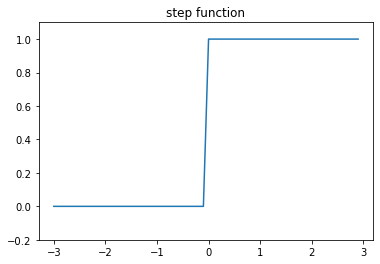

In [12]:
x = np.arange(-3.0,3.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.2,1.1)
plt.title('step function')
plt.show

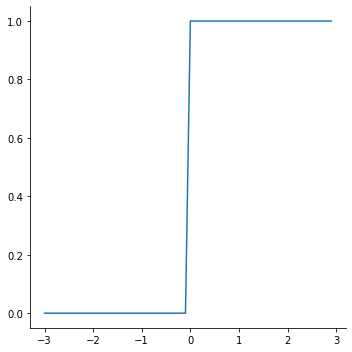

In [24]:
import seaborn as sns
x = np.arange(-3.0,3.0,0.1)
y = step_function(x)
sns.relplot(x = x, y = y, kind='line')


## 시그모이드 함수

시그모이드 함수의 유래 

> * 오즈비율함수 -> 실패할 확률 대비 , 성공할 확률을 구하는 함수
>> ↓
> * 로짓함수 -> 오즈비율 함수에 로그를 사용한 함수 
>> ↓
> * 시그모이드 함수 -> 로짓함수를 신경망에서 p(확률)값을 계산 하기 편하도록 지수형태로 바꾼 함수 

$$ y = \frac{1}{1+e^{-x}} $$

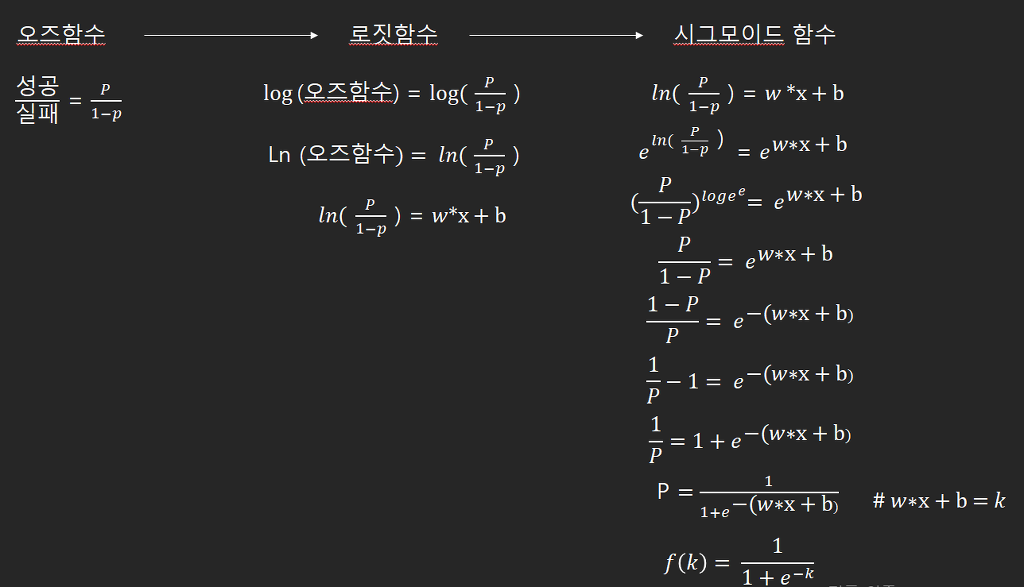

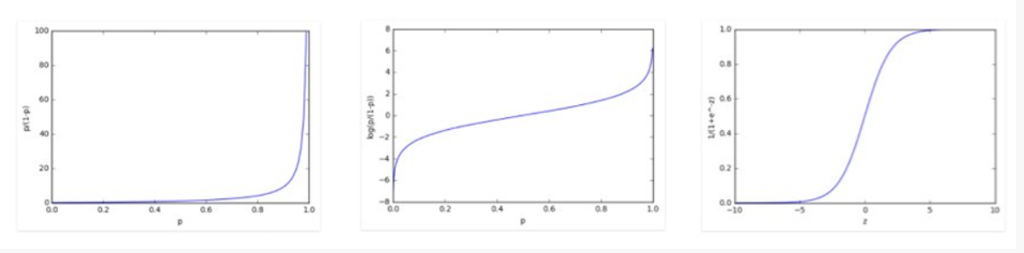


### 문제35.  시그모이드 함수를 파이썬으로 구현하시오 

In [14]:
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [15]:
x_data = np.array ([-0.5,1.0,2.0])
print(sigmoid(x_data))

[0.37754067 0.73105858 0.88079708]


### 문제36. 책 73 시그모이드 함수를 그래프로 그리시오. 

<function matplotlib.pyplot.show(close=None, block=None)>

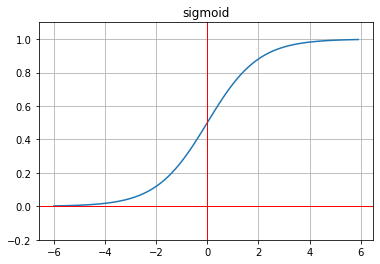

In [25]:
x = np.arange(-6.0,6.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.2,1.1)
plt.title('sigmoid')
plt.axhline(y=0, color='r',linestyle='-', linewidth=1)
plt.axvline(x=0, color='r',linestyle='-', linewidth=1)
plt.grid()
plt.show

## 문제37. 오즈비율 함수 그래프를 그리시오 !

<function matplotlib.pyplot.show(close=None, block=None)>

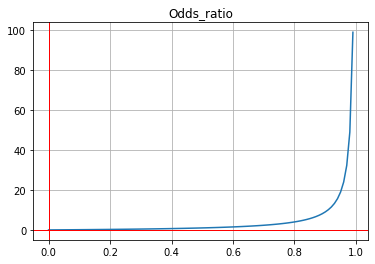

In [26]:
def odds_ratio_func(x):
    y = x / (1-x)
    return y 
    
x = np.arange(0,1,0.01)
y = odds_ratio_func(x)
plt.plot(x,y)
# plt.ylim(-0.2,1.1)
plt.title('Odds_ratio')
plt.axhline(y=0, color='r',linestyle='-', linewidth=1)
plt.axvline(x=0, color='r',linestyle='-', linewidth=1)
plt.grid()
plt.show

## 문제38. 로짓함수도 그래프로 시각화 하시오 ! 



<ipython-input-18-e84fa4af192d>:2: RuntimeWarning: divide by zero encountered in log
  y = np.log(x / (1-x))


<function matplotlib.pyplot.show(close=None, block=None)>

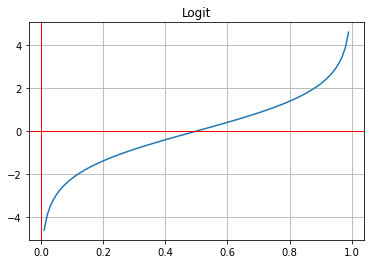

In [18]:
def logit(x):
    y = np.log(x / (1-x))
    return y
    
x = np.arange(0,1,0.01)
y = logit(x)
plt.plot(x,y)
# plt.ylim(-0.2,1.1)
plt.title('Logit')
plt.axhline(y=0, color='r',linestyle='-', linewidth=1)
plt.axvline(x=0, color='r',linestyle='-', linewidth=1)
plt.grid()
plt.show